In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2


In [2]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [4]:
dir_name = "dataset/faces/"
y=[]; X =[]; target_names = []
person_id = 0;h=w=300
n_samples =0
class_names = []
for person_name in os.listdir(dir_name):
  dir_path = dir_name + person_name + "/"
  class_names.append(person_name)
  for image_name in os.listdir(dir_path):
    image_path = dir_path + image_name
    img =  cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray, (h,w))
    v = resized_image.flatten()
    X.append(v)
    n_samples = n_samples + 1
    y.append(person_id)
    target_names.append(person_name)
  person_id = person_id +1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape,X.shape,target_names.shape)
print("Number of samples :", n_samples )




n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


(450,) (450, 90000) (450,)
Number of samples : 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


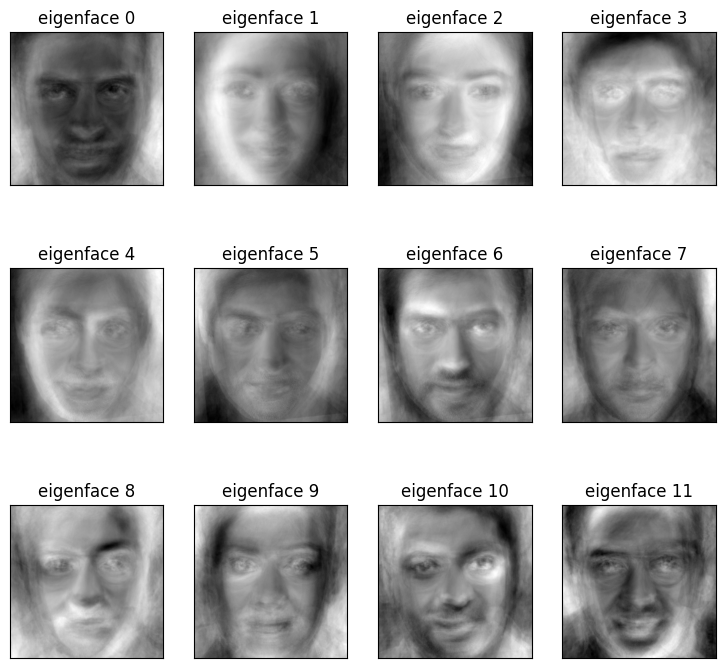

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project Completed


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
n_components = 150
print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))
pca = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components , h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project Completed")

In [6]:
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(10,10), max_iter=1000,verbose=True).fit(X_train_lda,y_train)
print("model weights : ")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.24555995
Iteration 2, loss = 3.18368439
Iteration 3, loss = 3.12747885
Iteration 4, loss = 3.06917653
Iteration 5, loss = 3.01157499
Iteration 6, loss = 2.95740725
Iteration 7, loss = 2.90254447
Iteration 8, loss = 2.84957645
Iteration 9, loss = 2.79946807
Iteration 10, loss = 2.75050633
Iteration 11, loss = 2.70173892
Iteration 12, loss = 2.65646341
Iteration 13, loss = 2.61128035
Iteration 14, loss = 2.56909795
Iteration 15, loss = 2.52599755
Iteration 16, loss = 2.48515967
Iteration 17, loss = 2.44582102
Iteration 18, loss = 2.40494097
Iteration 19, loss = 2.36943353
Iteration 20, loss = 2.33161188
Iteration 21, loss = 2.29676718
Iteration 22, loss = 2.26080627
Iteration 23, loss = 2.22597183
Iteration 24, loss = 2.19222151
Iteration 25, loss = 2.15940711
Iteration 26, loss = 2.12769476
Iteration 27, loss = 2.09546540
Iteration 28, loss = 2.06425383
Iteration 29, loss = 2.03419104
Iteration 30, loss = 2.00370148
Iteration 31, loss = 1.97470829
Iteration 32, los

Accuracy:  69.02654867256638


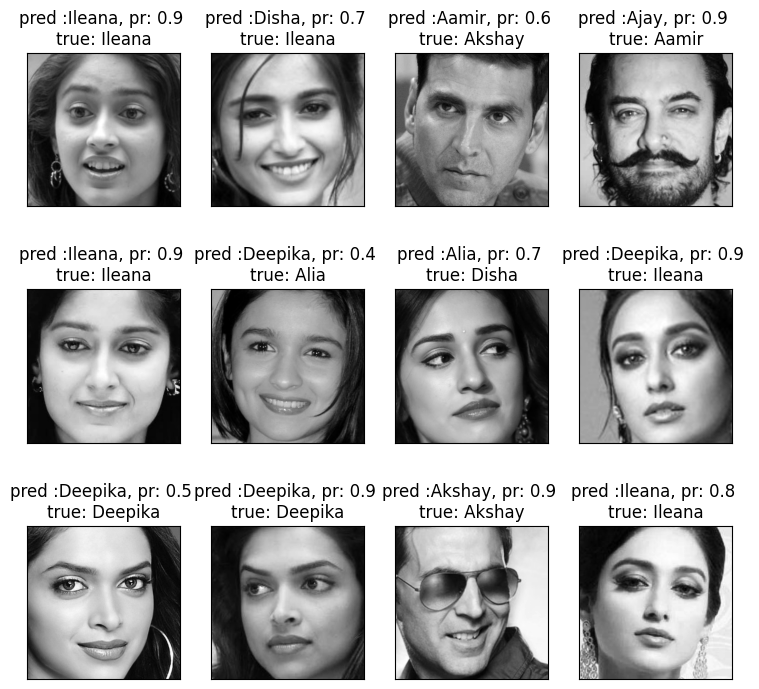

In [9]:
y_pred =[]
y_prob =[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob ==np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred :%s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive = true_positive+1;

print("Accuracy: ",true_positive*100/y_pred.shape[0])

plot_gallery(X_test, prediction_titles,h,w)
plt.show()
